# Project 12 -- [Pavan Kumar] [Battula]

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [1]:
library(data.table)
options(jupyter.rich_display = F)
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)

In [2]:
orders <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [10]:
orders$month_year_substr <- substr(orders$created_at, 1, 7)

In [9]:
table(orders$month_year_substr)


2019-05 2019-06 2019-07 2019-08 2019-09 2019-10 2019-11 2019-12 2020-01 2020-02 
      1   10120   10175    8933    6609   19893   18249   19815   17825   23683 

In [12]:
orders$month <- month(orders$created_at)

In [13]:
orders$year <- year(orders$created_at)

In [14]:
orders$month_year_func <- paste(orders$year, "-", orders$month, sep = "")

In [15]:
table(orders$month_year_func)


2019-10 2019-11 2019-12  2019-5  2019-6  2019-7  2019-8  2019-9  2020-1  2020-2 
  19893   18249   19815       1   10120   10175    8933    6609   17825   23683 

In [16]:
orders$month_year_format <- format(orders$created_at, "%Y-%m")

In [17]:
table(orders$month_year_format)


2019-05 2019-06 2019-07 2019-08 2019-09 2019-10 2019-11 2019-12 2020-01 2020-02 
      1   10120   10175    8933    6609   19893   18249   19815   17825   23683 

## Question 2

In [18]:
orders_count <- table(orders$customer_id)

In [19]:
max_orders_customer <- names(orders_count[orders_count == max(orders_count)])

In [28]:
max_orders_customer

[1] "XW90EAP"

In [23]:
customer_orders <- subset(orders, customer_id == max_orders_customer)
customer_month_year <- table(customer_orders$month_year_format)

In [24]:
max_month_year <- names(customer_month_year[customer_month_year == max(customer_month_year)])

In [27]:
max_month_year

[1] "2019-06"

## Question 3

In [29]:
payment_counts <- table(orders$payment_mode)

In [30]:
payment_counts


     1      2      3      4      5 
104714  22079   1361   6696    453 

In [31]:
customer_orders <- subset(orders, customer_id == max_orders_customer)

In [32]:
customer_payment_counts <- table(customer_orders$payment_mode)
customer_payment_counts


  1   2   4   5 
 59 188  14   1 

types of 5 is 1 time.

## Question 4

In [33]:
orders$created_at <- as.Date(orders$created_at)

In [41]:
ordersJan2020 <- subset(orders, format(created_at, "%Y-%m") == "2020-01")

In [42]:
ordersJan2020$day_of_week <- wday(ordersJan2020$created_at, label = TRUE)

In [43]:
library(ggplot2)

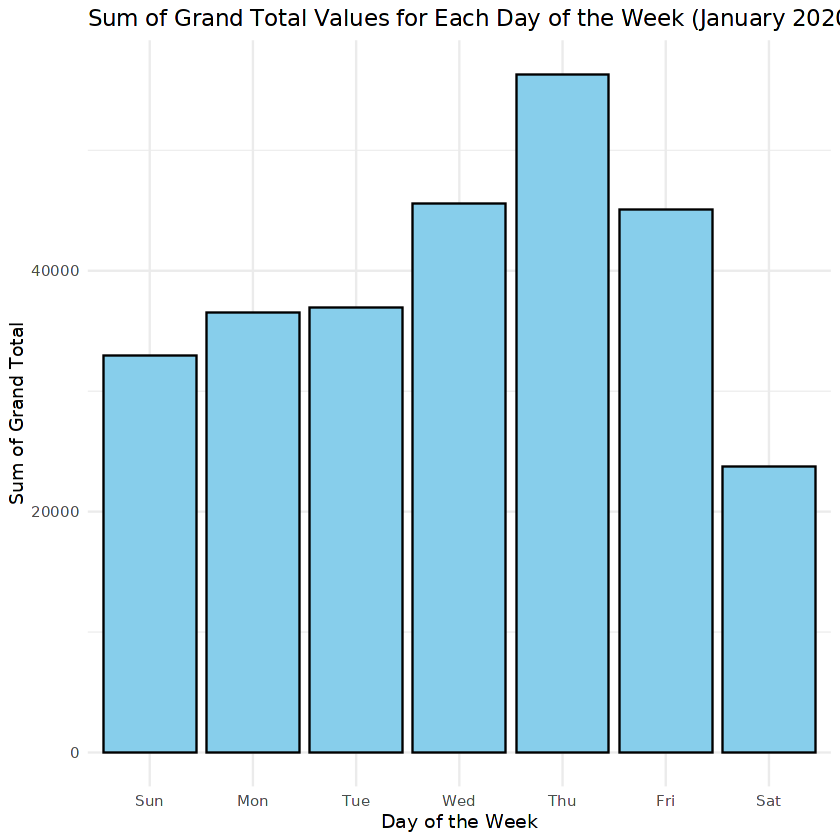

In [44]:
ggplot(ordersJan2020, aes(x = day_of_week, y = grand_total)) +
  geom_bar(stat = "summary", fun = "sum", fill = "skyblue", color = "black") +
  labs( title = "Sum of Grand Total Values for Each Day of the Week (January 2020)",
    x = "Day of the Week", y = "Sum of Grand Total") + theme_minimal()

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.